# PREDSTAVITEV GIBANJA CEN KRIPTOVALUT IN NJIHOVA ANALIZA

Avtor: Žan Luka Kolarič

## UVOD
V tej nalogi bom najprej pridobil podatke treh največjih kriptovalut za obdobje 10 let, lahko bi izbral tudi drugačno obdobje, jih uredil, analiziral in seveda shranil. Najprej bom dodal nekaj stolpcev z novimi podatki k že obstoječim podatkom, nato pa s pomočjo grafov analiziral gibanje cen, njihov volumen in njihove rasti.

## PRIDOBITEV IN UREJANJE PODATKOV

Najprej uvozim potrebne knjižnice, ki so potrebne za prenos podatkov in njihovo urejanje.


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

Za nadaljevanje si moramo na spletni strani Yahoo finance izbrati kriptovalute, katerih podatki nas zanimajo. Sam si bom izbral naslednje tri v primerjavi z ameriškim dolarjem:

In [2]:
imena_kriptovalut = ['BTC-USD', 'BNB-USD', 'ETH-USD']

Sedaj si lahko izberemo časovni interval, katerega bomo gledali tj. začetek (z) in konec (k).Če teh dveh parametrov ne izberemo, se nastavita na vrednosti z = "2015-09-17" in k = "2023-08-01". Sam bom izbral naslednji vrednosti:

In [3]:
z = "2017-07-17"
k = "2023-07-18"

Za uvoz podatkov bomo uporabili funkcijo, ki jo uvozimo iz datoteke funkcije.py. S pomočjo te funkcije sem sedaj sestavil slovar, v katerem imam tri tabele, po eno za vsako kriptovaluto. Za predstavo si lahko pogledamo tabelo za Bitcoin:

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


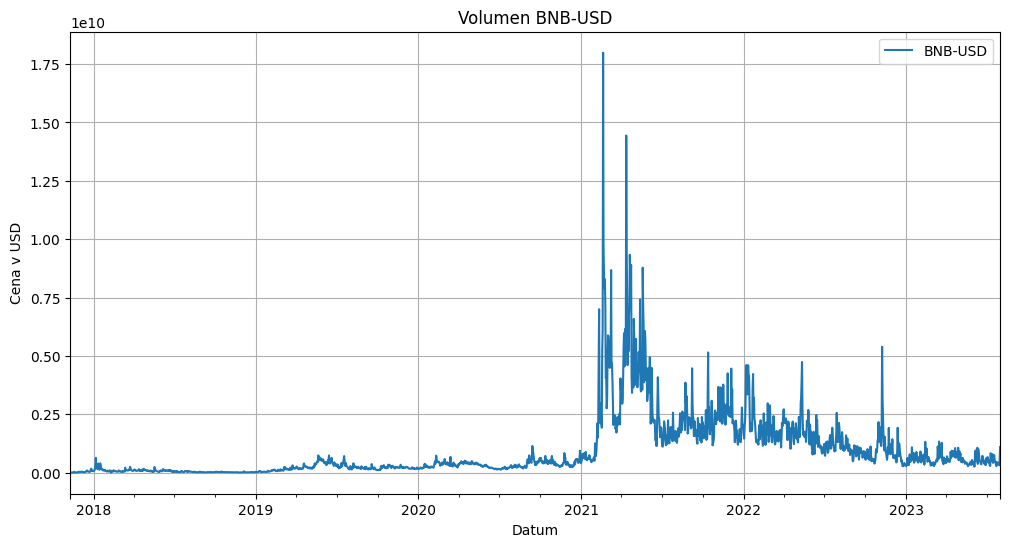

None
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-17,1932.619995,2230.489990,1932.619995,2228.409912,2228.409912,1201760000
2017-07-18,2233.520020,2387.610107,2164.770020,2318.879883,2318.879883,1512450048
2017-07-19,2323.080078,2397.169922,2260.229980,2273.429932,2273.429932,1245100032
2017-07-20,2269.889893,2900.699951,2269.889893,2817.600098,2817.600098,2249260032
2017-07-21,2838.409912,2838.409912,2621.850098,2667.760010,2667.760010,1489449984
...,...,...,...,...,...,...
2023-07-13,30387.488281,31814.515625,30268.351562,31476.048828,31476.048828,23686079548
2023-07-14,31474.720703,31582.253906,29966.386719,30334.068359,30334.068359,20917902660
2023-07-15,30331.783203,30407.781250,30263.462891,30295.806641,30295.806641,8011667756


In [4]:
from funkcije import pridobi_podatke
podatki_o_kriptovalutah = pridobi_podatke(imena_kriptovalut, z, k)
podatki_o_kriptovalutah["BTC-USD"]

## UREJANJE TABEL

Da bodo tabele lepo urejene najprej zapolnimo prazne prostore v tabelah. To storimo s pomočjo funkcije 'ffill'. Ta funkcija prazne prostore zapolni z podatki iz prejšnjega znanega dne. Za lažjo preglednost bomo vse podatke zaokrožili na 4 decimalna mesta. Vse to storimo z naslednjo funkcijo:

In [5]:
from funkcije import uredi_podatke
podatki_o_kriptovalutah = uredi_podatke(podatki_o_kriptovalutah)
podatki_o_kriptovalutah["BTC-USD"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-17,1932.6200,2230.4900,1932.6200,2228.4099,2228.4099,1201760000
2017-07-18,2233.5200,2387.6101,2164.7700,2318.8799,2318.8799,1512450048
2017-07-19,2323.0801,2397.1699,2260.2300,2273.4299,2273.4299,1245100032
2017-07-20,2269.8899,2900.7000,2269.8899,2817.6001,2817.6001,2249260032
2017-07-21,2838.4099,2838.4099,2621.8501,2667.7600,2667.7600,1489449984
...,...,...,...,...,...,...
2023-07-13,30387.4883,31814.5156,30268.3516,31476.0488,31476.0488,23686079548
2023-07-14,31474.7207,31582.2539,29966.3867,30334.0684,30334.0684,20917902660
2023-07-15,30331.7832,30407.7812,30263.4629,30295.8066,30295.8066,8011667756


## DOPOLNITEV TABEL

Do sedaj imamo za vse kriptovalute za vsak dan podano odpiralno vrednost ("Open"), najvišjo vrednost ("High), najnižjo vrednost ("Low"), zapiralno vrednost ("Close"), prilagojeno zaključno vrednost ("Adj close") in volumen ("Volume")V tem delu bomo našim tabelam dodali nove stolpce, v katerih bomo izračunali dnevno rast kriptovalut, ki nam pove za koliko enot se je tečaj spremenil v enem dnevu, njihovo dnevno povprečje, njihovo rast v procentih ter rast glede na določen datum x, za vse kasnejše dneve našega intervala.

### DNEVNA RAST


In [6]:
from funkcije import dodaj_dnevna_rast
podatki_o_kriptovalutah = dodaj_dnevna_rast(podatki_o_kriptovalutah)
podatki_o_kriptovalutah["BTC-USD"]

,Open,High,Low,Close,Adj Close,Volume,Dnevna rast
Date,,,,,,,
2017-07-17,1932.6200,2230.4900,1932.6200,2228.4099,2228.4099,1201760000,295.7899
2017-07-18,2233.5200,2387.6101,2164.7700,2318.8799,2318.8799,1512450048,85.3599
2017-07-19,2323.0801,2397.1699,2260.2300,2273.4299,2273.4299,1245100032,-49.6502
2017-07-20,2269.8899,2900.7000,2269.8899,2817.6001,2817.6001,2249260032,547.7102
2017-07-21,2838.4099,2838.4099,2621.8501,2667.7600,2667.7600,1489449984,-170.6499
...,...,...,...,...,...,...,...
2023-07-13,30387.4883,31814.5156,30268.3516,31476.0488,31476.0488,23686079548,1088.5605
2023-07-14,31474.7207,31582.2539,29966.3867,30334.0684,30334.0684,20917902660,-1140.6523
2023-07-15,30331.7832,30407.7812,30263.4629,30295.8066,30295.8066,8011667756,-35.9766


### POVPREČJE

Sam sem povprečno vrednost dneva izračunal kot povprečje med začetno in končno vrednostjo. Lahko bi ga iračunali tudi glede na začetno vrednost enega in začetno vrednostjo drugega dneva, ali pa celo z končnimi vrednostmi, vendar to pri kriptovalutah ni tako pomembno, saj se lahko trgujejo skozi dloten dan in ne samo določen del dneva, tako kot delnice na borzah.

In [7]:
from funkcije import povprecje
podatki_o_kriptovalutah = povprecje(podatki_o_kriptovalutah)
podatki_o_kriptovalutah["BTC-USD"]

,Open,High,Low,Close,Adj Close,Volume,Dnevna rast,Povprečje
Date,,,,,,,,
2017-07-17,1932.6200,2230.4900,1932.6200,2228.4099,2228.4099,1201760000,295.7899,2080.5149
2017-07-18,2233.5200,2387.6101,2164.7700,2318.8799,2318.8799,1512450048,85.3599,2276.2000
2017-07-19,2323.0801,2397.1699,2260.2300,2273.4299,2273.4299,1245100032,-49.6502,2298.2550
2017-07-20,2269.8899,2900.7000,2269.8899,2817.6001,2817.6001,2249260032,547.7102,2543.7450
2017-07-21,2838.4099,2838.4099,2621.8501,2667.7600,2667.7600,1489449984,-170.6499,2753.0850
...,...,...,...,...,...,...,...,...
2023-07-13,30387.4883,31814.5156,30268.3516,31476.0488,31476.0488,23686079548,1088.5605,30931.7686
2023-07-14,31474.7207,31582.2539,29966.3867,30334.0684,30334.0684,20917902660,-1140.6523,30904.3946
2023-07-15,30331.7832,30407.7812,30263.4629,30295.8066,30295.8066,8011667756,-35.9766,30313.7949


### RAST V PROCENTIH

Da bomo lažje primerjali gibanje kriptovalut si bomo izračunali njihovo rast. Izračunali jo bomo kot kvocient med končno in začetno vrednostjo, od katerega odštejemo 1 in pomnožimo s 100. Tako dobimo vrednost v procentih.

In [8]:
from funkcije import rast_v_procentih
podatki_o_kriptovalutah = rast_v_procentih(podatki_o_kriptovalutah)
podatki_o_kriptovalutah["BTC-USD"]

,Open,High,Low,Close,Adj Close,Volume,Dnevna rast,Povprečje,Rast v %
Date,,,,,,,,,
2017-07-17,1932.6200,2230.4900,1932.6200,2228.4099,2228.4099,1201760000,295.7899,2080.5149,15.3051
2017-07-18,2233.5200,2387.6101,2164.7700,2318.8799,2318.8799,1512450048,85.3599,2276.2000,3.8218
2017-07-19,2323.0801,2397.1699,2260.2300,2273.4299,2273.4299,1245100032,-49.6502,2298.2550,-2.1373
2017-07-20,2269.8899,2900.7000,2269.8899,2817.6001,2817.6001,2249260032,547.7102,2543.7450,24.1294
2017-07-21,2838.4099,2838.4099,2621.8501,2667.7600,2667.7600,1489449984,-170.6499,2753.0850,-6.0122
...,...,...,...,...,...,...,...,...,...
2023-07-13,30387.4883,31814.5156,30268.3516,31476.0488,31476.0488,23686079548,1088.5605,30931.7686,3.5823
2023-07-14,31474.7207,31582.2539,29966.3867,30334.0684,30334.0684,20917902660,-1140.6523,30904.3946,-3.6240
2023-07-15,30331.7832,30407.7812,30263.4629,30295.8066,30295.8066,8011667756,-35.9766,30313.7949,-0.1186


## SHRANJEVANJE

Podatke želimo shraniti v datoteke formata .csv, v ločeno mapo imenovano datoteke in za vsako kriptovaluto posebej za lažjo preglednost.. To storimo z naslednjo funkcijo:

In [9]:
from funkcije import shrani
shrani(podatki_o_kriptovalutah)

## RISANJE GRAFOV

V tem razdelku bomo analizirali pridobljene in izračunane podatke s pomočjo grafov.

### GRAF CEN
Sestavili bomo graf s pomočjo funkcije iz knjižnice matplotlib.pyplot. Uporabili bomo odpiralne ter povprečne cene trgovalnega dne za vsako valuto in zapisali ugotovitve. Prvi graf nam prikazuje odpiralne cene, drugi graf pa povprečne cene.

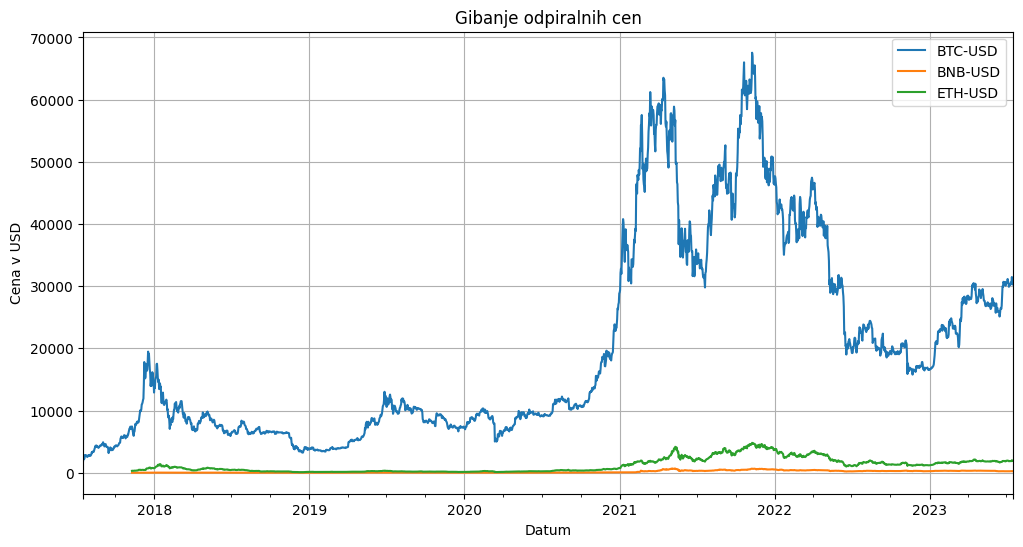

In [10]:
from funkcije import graf_odpiralnih_cen
graf_odpiralnih_cen(podatki_o_kriptovalutah)

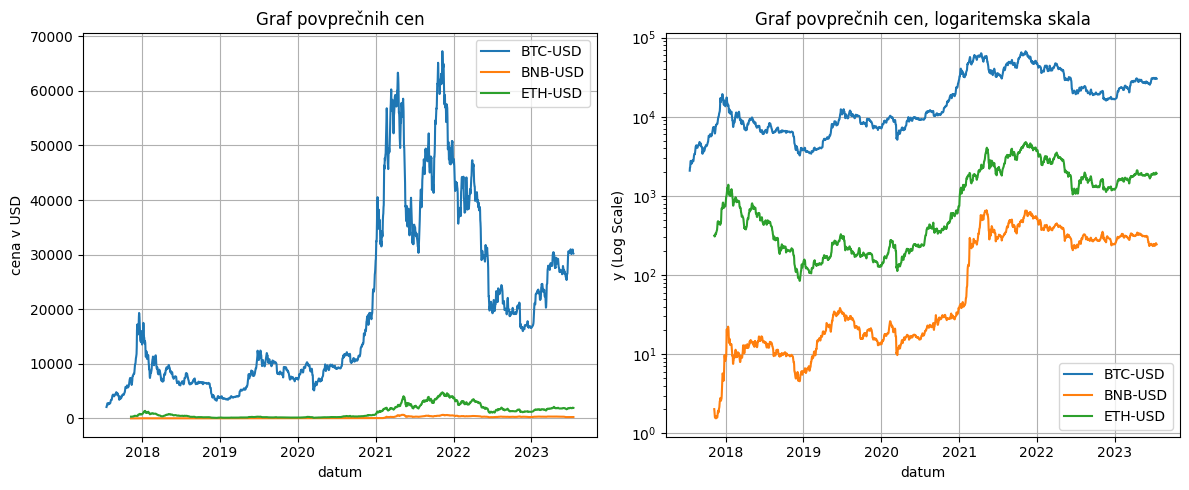

In [11]:
from funkcije import graf_povprecnih_cen
graf_povprecnih_cen(podatki_o_kriptovalutah)

Kot lahko vidimo, so cene Bitcoina veliko višje kot cene od Ethereuma, z Binance coin pa skoraj ne moremo primerjati, zato smo pri povprečnih cenah naredili tudi graf v logaritemski skali za lažje primerjanje.

Vidimo lahko, da se cene vseh treh gibljejo približno enako. Vsi so imeli svoj maksimum v letu 2021, ko se je pa rast ustavila in je cena začela padat. 

### GRAF RASTI V PROCENTIH
Sedaj si bomo pogledali kako se je spreminjala rast teh kriptovalut.

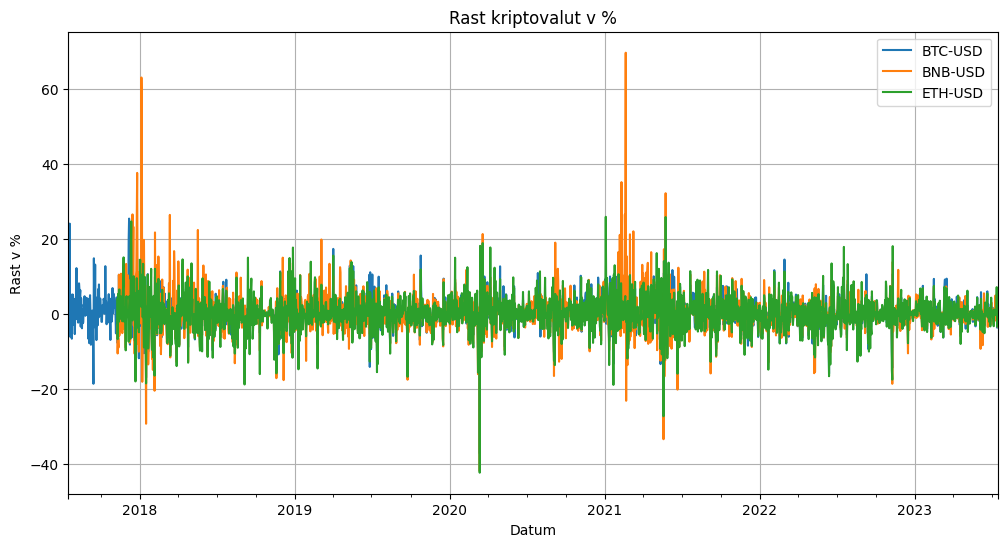

In [12]:
from funkcije import graf_rasti_v_procentih
graf_rasti_v_procentih(podatki_o_kriptovalutah)

Kot vidimo je vse skupaj zelo nejasno, zato si bomo kot opazovalno obdobje izbrali le obdobje zadnjega pol leta. Znova lahko za z in k vzamemo različne parametre.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


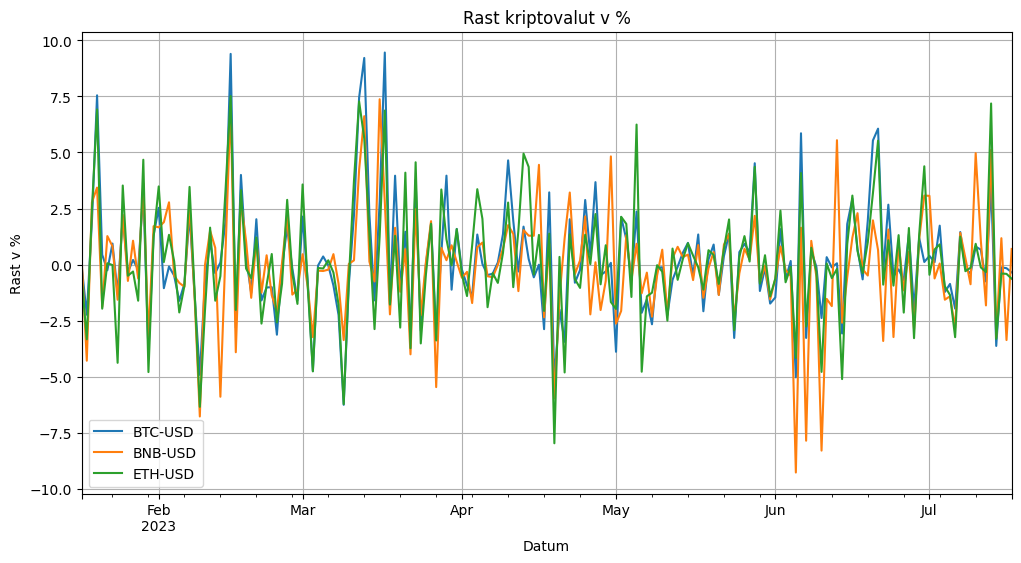

In [13]:
zacetek = "2023-01-17"
konec = "2023-07-18"
podatki_o_kriptovalutah = rast_v_procentih(povprecje(dodaj_dnevna_rast(uredi_podatke(pridobi_podatke(imena_kriptovalut, zacetek, konec)))))
graf_rasti_v_procentih(podatki_o_kriptovalutah)


Opazimo lahko, da v obdobju zadnjega pol leta ni bilo bistvenih sprememb v ceni. Vse tri valute imajo zelo veliko nihanje, kar pa seveda ni najbolje. Če bi si morda pogledli obdobje največje rasti, tj. leto 2021 pa je stvar povsem drugačna. Tam lahko vidimo pozitivno rast v večini obdobja. Največjo rast je v začetki leta imel Binance coin, Ethereum in Bitcoin pa sta bila dokaj izenačena. vidimo lahko, da je BNB v enem dnevu zrastel za več kot 60 %.

### GRAF VOLUMNA

Volumen kriptovalute je količina kriptovalute, ki je bila trgovana v določenem obdobju. Pove, koliko enot te kriptovalute je bilo kupljenih ali prodanih med trgovskim obdobjem. Visok volumen običajno kaže na veliko zanimanje in aktivnost trgovcev za to kriptovaluto, medtem ko nizek volumen lahko kaže na manjši obseg trgovanja. Volumen se zelo močno povezuje tudi z gibanjem cen. Na primer visok volumen v kombinaciji z rastjo cen lahko nakazuje močan trend navzgor, medtem ko visok volumen v kombinaciji s padanjem cen lahko nakazuje močan trend navzdol.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


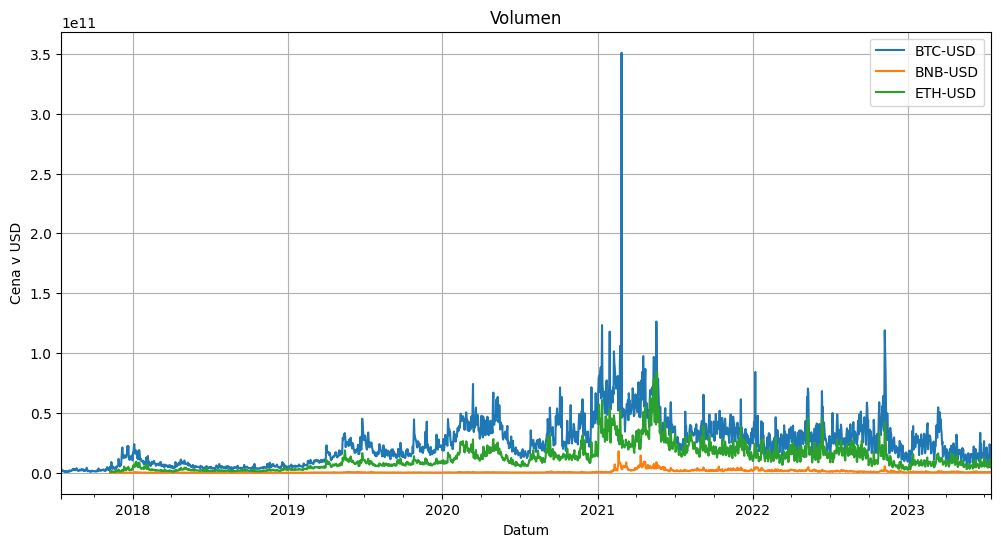

In [14]:
from funkcije import graf_volumna
podatki_o_kriptovalutah = rast_v_procentih(povprecje(dodaj_dnevna_rast(uredi_podatke(pridobi_podatke(imena_kriptovalut, z, k)))))

graf_volumna(podatki_o_kriptovalutah)

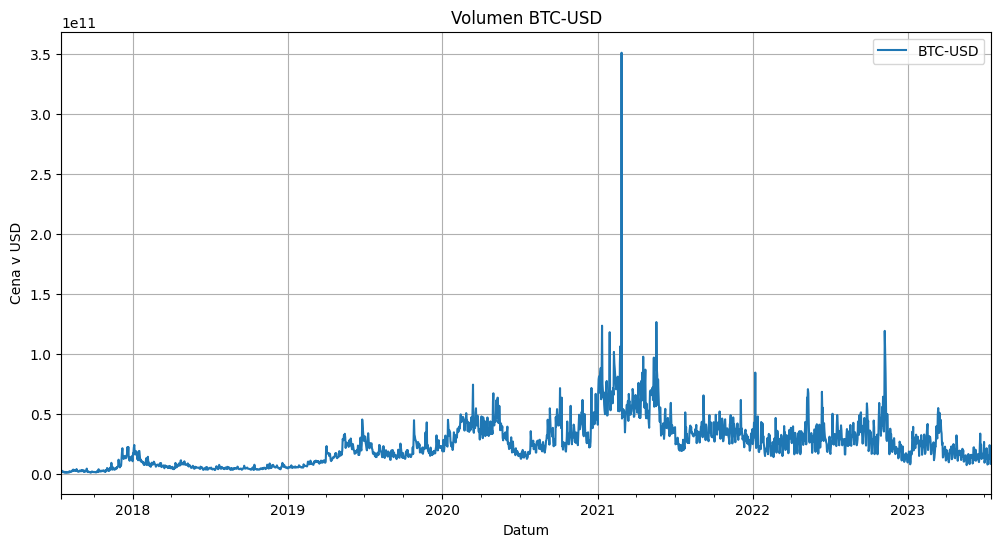

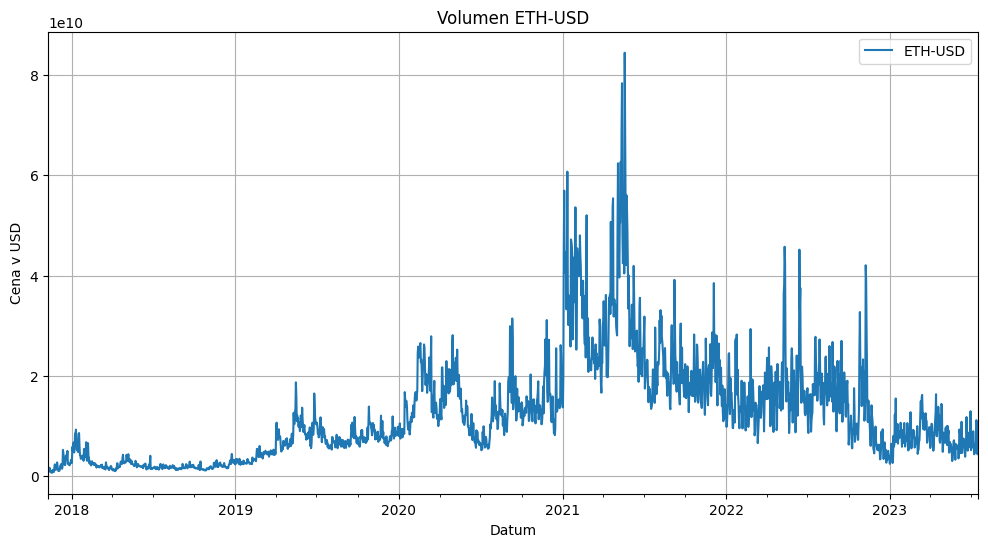

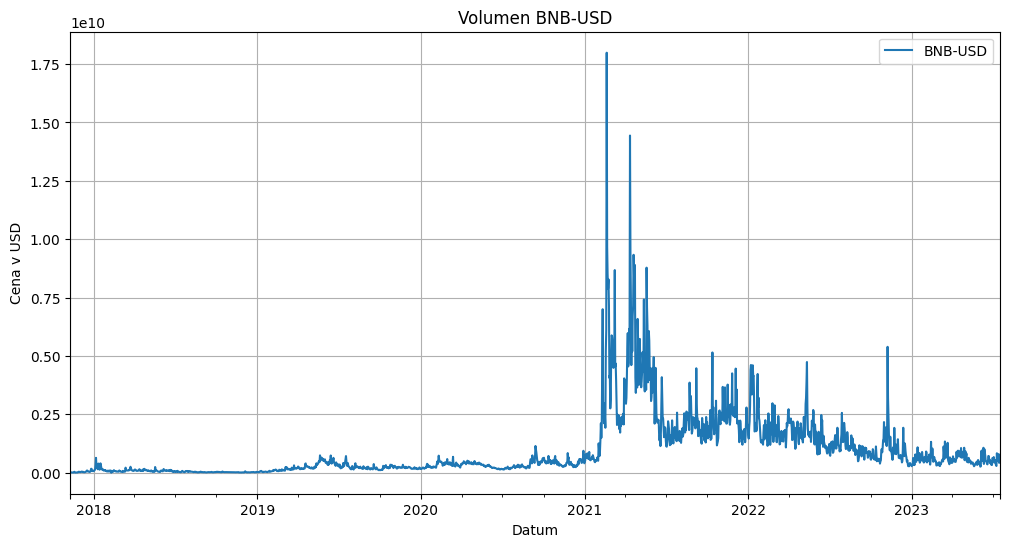

In [15]:
from funkcije import graf_volumna_BTC
from funkcije import graf_volumna_ETH
from funkcije import graf_volumna_BNB

graf_volumna_BTC(podatki_o_kriptovalutah)
graf_volumna_ETH(podatki_o_kriptovalutah)
graf_volumna_BNB(podatki_o_kriptovalutah)